In [113]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline


In [114]:
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
data=pd.read_csv("housing.csv",sep='\s+',names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [116]:
data.shape

(506, 14)

In [117]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [119]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Data Visualisation

In [120]:
#sns.pairplot(data)

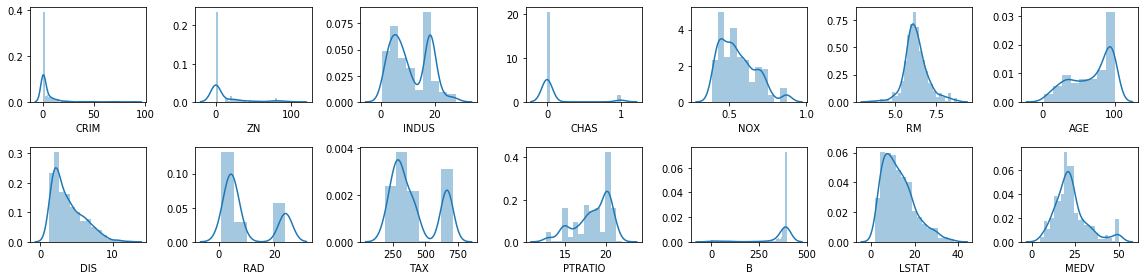

In [121]:
rows=2
cols=7
#plt.subplots(nrows=rows, ncols= cols, figsize=(16,4))
fig, ax = plt.subplots(nrows=rows, ncols= cols, figsize=(16,4))
col=data.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax=ax[i][j])
        index+=1
plt.tight_layout()

In [122]:
cormat= data.corr()
cormat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [123]:
#fig, ax = plt.subplots(figsize=(18,10))
#plt.figure(figsize=(18,10))
#sns.heatmap(cormat, annot = True, annot_kws={'size':12})

In [124]:
#getting features which are corrleated with target variable
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame( data = value, index=feature , columns=['Corr value'])
    return df

In [125]:
threshold=0.50
corr_value=getCorrelatedFeature(cormat['MEDV'],threshold)
corr_value

,Corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


In [126]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'MEDV'], dtype=object)

In [127]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


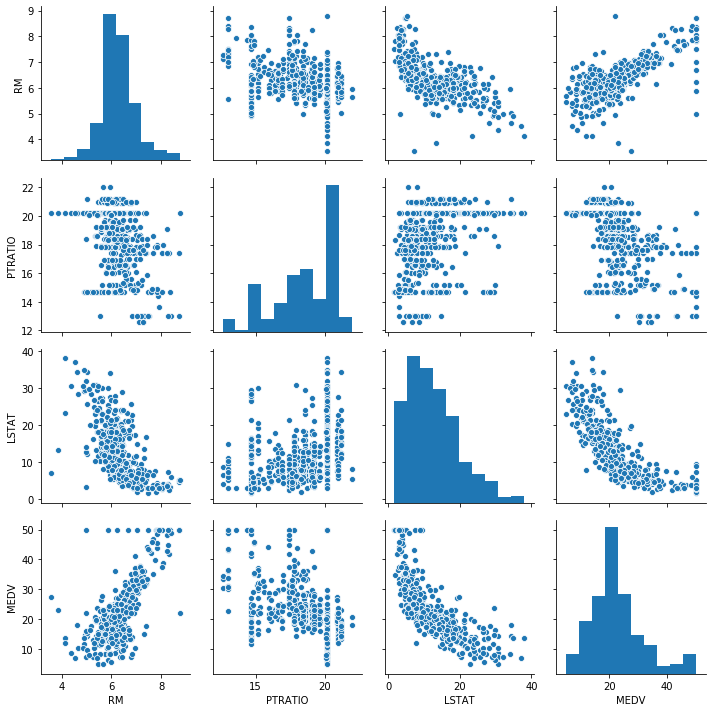

In [128]:
sns.pairplot(correlated_data)
plt.tight_layout()

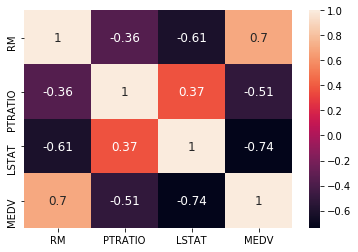

In [129]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

In [130]:
X=correlated_data.drop(labels=["MEDV"], axis=1,)
y=correlated_data["MEDV"]
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [131]:
X_train,X_test,y_train,y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=0)


In [132]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

In [133]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_predict=model.predict(X_test)

In [135]:
out_df=pd.DataFrame(data=[y_predict,y_test])
out_df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


In [136]:
print(model.score(X_test,y_test))

0.4881642015692508


In [137]:
from sklearn.metrics import r2_score

In [138]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)

print('r2',score)
print('mae',mae)
print('mse',mse)

r2 0.4881642015692508
mae 4.404434993909256
mse 41.67799012221682


In [173]:
total_features=[]
total_features_name=[]
selected_cor_value=[]
r2_score =[]
mae_value=[]
mse_value=[]

In [174]:
def performance_metrics(features,thr,y_true,y_pred):
    #\score = r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_cor_value.append(thr)
    r2_score.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_df=pd.DataFrame(data=[total_features_name, total_features,selected_cor_value,r2_score,mae_value,mse_value ],
                           index = ['features name','#feature','corr_value','r2_score','mae','mse'])
    return metrics_df.T

In [175]:
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,mae,mse
0,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'M...,6,0.4,0.488164,4.40443,41.678


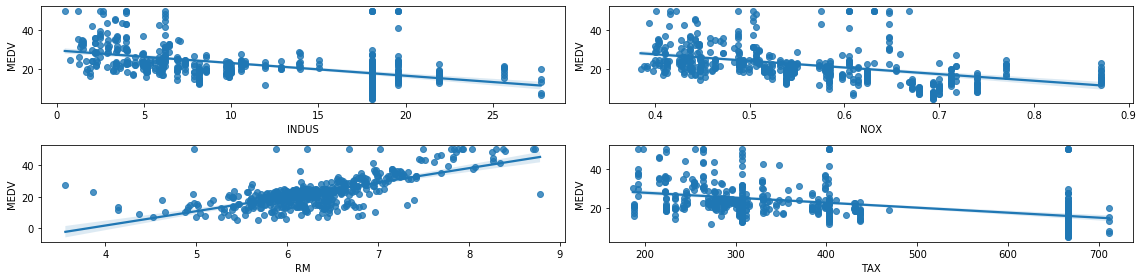

In [176]:
rows=2
cols=2
fig,ax = plt.subplots(nrows=rows,ncols=cols, figsize=(16,4))

col=correlated_data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data["MEDV"] , ax=ax[i][j])
        index+=1
fig.tight_layout()

Selecting only features with more than 60 correleation

In [177]:
cormat["MEDV"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [178]:
threshold=0.6
corr_value=getCorrelatedFeature(cormat['MEDV'],threshold)
corr_value

,Corr value
RM,0.695360
LSTAT,-0.737663
MEDV,1.000000


In [179]:
correlated_data=data[corr_value.index]
correlated_data.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [180]:
def get_y_predict(corr_data):
    x=corr_data.drop(labels=['MEDV'],axis=1)
    y=corr_data["MEDV"]
    
    X_train,X_test,y_train,y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=0)
    model=linear_model.LinearRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_predict
    

In [181]:
y_predict=get_y_predict(correlated_data)

In [182]:
performance_metrics(correlated_data.columns.values,threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,mae,mse
0,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'M...,6,0.4,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'MEDV'],2,0.6,0.488164,4.40443,41.678


In [183]:
threshold = 0.40
corr_value=getCorrelatedFeature(cormat['MEDV'],threshold)
corr_value

,Corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


In [184]:
correlated_data=data[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [185]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold,y_test,y_predict)

,features name,#feature,corr_value,r2_score,mae,mse
0,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'M...,6,0.4,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'MEDV'],2,0.6,0.488164,4.40443,41.678
2,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'M...,6,0.4,0.488164,4.40443,41.678


In [186]:
scaler=StandardScaler()
scaler.fit(data)
data_t=pd.DataFrame(scaler.transform(data),columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [187]:
print(data_t.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


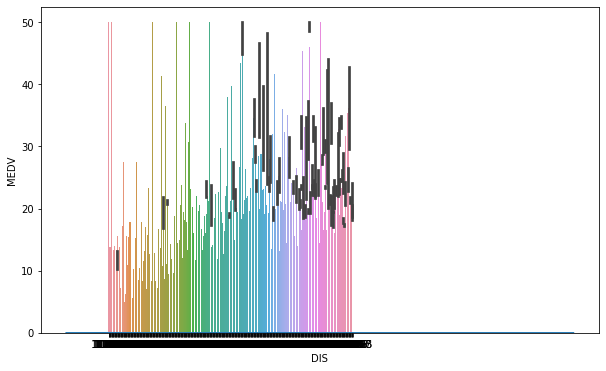

In [188]:
plt.figure(figsize=(10,6))
sns.barplot(y=data["MEDV"],x=data["DIS"])
sns.distplot(a=data)

In [189]:
Y=data_t.MEDV
X=data_t.iloc[:,[0,1,4,5,7,8,9,10,11,12]]

In [190]:
print(X.head())

       CRIM        ZN       NOX        RM       DIS       RAD       TAX  \
0 -0.419782  0.284830 -0.144217  0.413672  0.140214 -0.982843 -0.666608   
1 -0.417339 -0.487722 -0.740262  0.194274  0.557160 -0.867883 -0.987329   
2 -0.417342 -0.487722 -0.740262  1.282714  0.557160 -0.867883 -0.987329   
3 -0.416750 -0.487722 -0.835284  1.016303  1.077737 -0.752922 -1.106115   
4 -0.412482 -0.487722 -0.835284  1.228577  1.077737 -0.752922 -1.106115   

    PTRATIO         B     LSTAT  
0 -1.459000  0.441052 -1.075562  
1 -0.303094  0.441052 -0.492439  
2 -0.303094  0.396427 -1.208727  
3  0.113032  0.416163 -1.361517  
4  0.113032  0.441052 -1.026501  


In [191]:
x_train,x_test,y_train,y_test =sklearn.model_selection.train_test_split(X,Y,test_size=0.3)


In [192]:
Linear=linear_model.LinearRegression()
Linear.fit(x_train,y_train)
acc=Linear.score(x_test,y_test)
print(acc*100)

78.99837289273715
